In [49]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [58]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [59]:
y.index = y.name

In [60]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [61]:
y.index = pd.to_datetime(y.index)

In [62]:
y.sort_index()

,BasicEPS
1985-09-30,NaN
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,NaN
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [63]:
y.head()

,BasicEPS
2023-09-30,1.47
2023-06-30,1.27
2023-03-31,1.53
2022-12-31,1.89
2022-09-30,1.29


In [64]:
#Check if NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [57]:
from pytrends.request import TrendReq

In [67]:
import time

# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone" , "Recession" , "Samsung" , "Interest Rates" , "New Phone" , "Buy iPhone" , "Sell iPhone" , "Taylor Swift Tickets" , "Hospital" , "UCLA"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [75]:
df = df.resample("Q").mean()

In [76]:
df

,iPhone,Recession,Samsung,Interest Rates,New Phone,Buy iPhone,Sell iPhone,Taylor Swift Tickets,Hospital,UCLA
date,,,,,,,,,,
2004-03-31,0.000000,7.666667,24.666667,61.666667,48.000000,0.000000,1.000000,0.000000,79.333333,88.333333
2004-06-30,0.000000,8.000000,24.000000,66.000000,49.000000,0.000000,0.666667,0.000000,73.666667,85.333333
2004-09-30,0.000000,6.666667,27.666667,53.333333,51.333333,0.000000,0.666667,0.000000,80.333333,78.000000
2004-12-31,0.000000,7.666667,30.000000,46.000000,46.000000,0.000000,0.000000,0.000000,73.000000,85.333333
2005-03-31,0.000000,6.333333,27.333333,47.666667,44.333333,0.000000,0.000000,0.000000,77.333333,83.333333
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,48.666667,36.000000,55.000000,84.000000,76.333333,25.333333,25.000000,13.333333,79.333333,41.000000
2023-06-30,43.666667,31.333333,52.333333,74.000000,72.666667,22.333333,25.000000,52.333333,79.666667,29.333333
2023-09-30,54.000000,22.333333,57.333333,75.000000,83.666667,30.666667,32.333333,56.333333,83.666667,30.000000


# 2.) Normalize all the X data

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [74]:
X_scaled = scaler.fit_transform(df)

In [91]:
X_scaled

array([[-1.79005642, -0.69712684, -1.64459703, ..., -0.37960558,
         0.70836112,  2.36748113],
       [-1.79005642, -0.75056436, -1.80330547, ..., -0.37960558,
         0.4221666 ,  1.31507321],
       [-1.79005642, -0.69712684, -1.69749985, ..., -0.37960558,
         0.70836112,  1.73603638],
       ...,
       [ 0.53263079,  0.05099846,  0.10119584, ...,  2.57152165,
         0.70836112, -0.47402025],
       [ 0.53263079, -0.1093141 , -0.00460979, ...,  0.80084531,
         0.56526386, -1.105465  ],
       [ 0.48522901, -0.21618914, -0.11041542, ...,  0.88516324,
         0.85145838, -1.105465  ]])

# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [78]:
from sklearn.linear_model import Lasso

In [110]:
lasso = Lasso(alpha = .1) # using a smaller alpha instead to show clearer magnitudes

In [111]:
X_scaled2 = X_scaled[:len(y), :]
y = np.ravel(y)

In [112]:
lasso.fit(X_scaled2, y)

Lasso(alpha=0.1)

In [113]:
coefficients = lasso.coef_

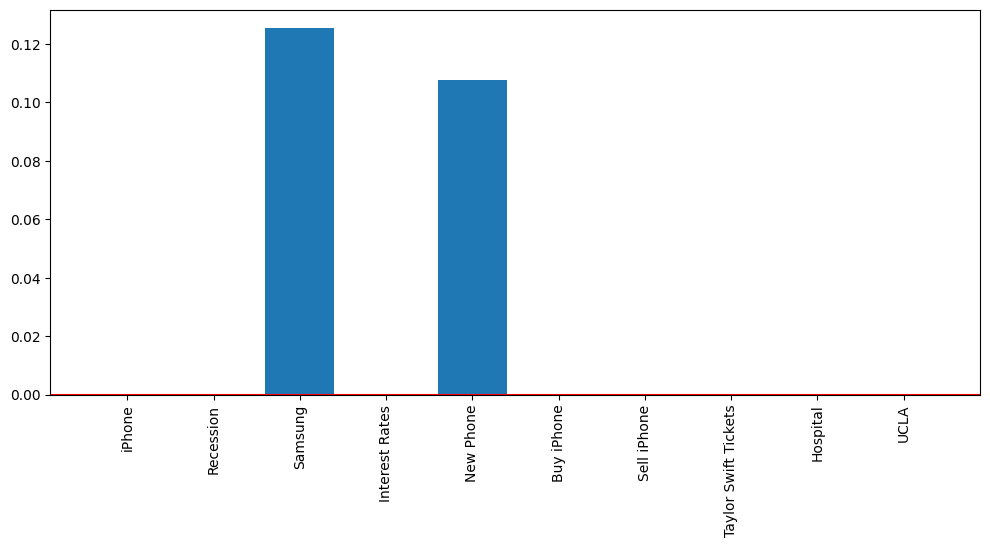

In [114]:
labels = ["iPhone", "Recession", "Samsung", "Interest Rates", "New Phone", "Buy iPhone", "Sell iPhone", "Taylor Swift Tickets", "Hospital", "UCLA"]

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients, tick_label=labels)
plt.axhline(0, color="red")
plt.xticks(rotation=90)  # Rotate the labels to prevent overlapping if necessary
plt.show()


# 5.) Do these coefficient magnitudes make sense?

These coefficient magnitudes do not make sense since the strongest coefficients are "Samsung" and "New Phone" while the coefficient of "iPhone" which should be the most relevant coefficient is zero. Moreover, "Samsung" which should have a negative correlation has the highest positive coefficient.

In [ ]:
#------ stop here ------#

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?